# Post-processing the data from variational monte carlo

In this jupyter notebook we will present our post-analytical results from several different runs with different parameters. All of the .txt files will be found in the directory "Results". Another reason to use a Jupyter Notebook is to generate reproducibility. Thus, the latest updated jupyter notebook should also show the same figures and results as the ones included in the final report. However, please be aware that the results will change every run as a result of random walks in the metropolis algorithm and initial setup of the system. 

Firstly, we need to define which libraries should be included. Lots of these are self-explanatory, while seaborn is added for some beautiful and handy visualization tools.  

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
from matplotlib import cm
import os
import pandas as pd
import seaborn as sns
sns.set()


# Where to save the figures and data files
DATA_ID = "Results/"

def data_path(dat_id):
    return os.path.join(DATA_ID, dat_id)

#Latex font for plots
rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
rc('text', usetex=True)
rc('font', family='serif')
plt.rcParams.update({'font.size': 10}) # Setting all font sizesimport numpy as np

## The energy as a function of the variational parameter alpha

For the easiest case of only one particle in 3 dimensions, we analyse how the ground state energy behave while changing the variational parameter $\alpha$. This situation is treated as a spherical harmoic oscillator with no interaction. 

/usr/local/lib/python3.7/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python3.7/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python3.7/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


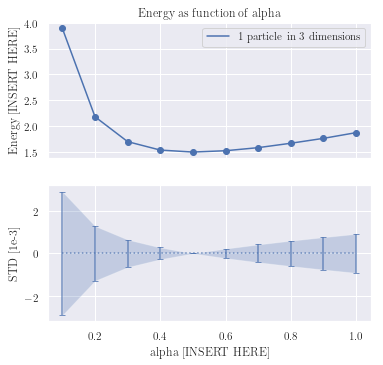

   alpha    Energy       STD
0    0.1  3.888679  0.002913
1    0.2  2.182040  0.001289
2    0.3  1.700976  0.000648
3    0.4  1.538126  0.000276
4    0.5  1.500000  0.000000
5    0.6  1.525424  0.000224
6    0.7  1.584858  0.000420
7    0.8  1.670003  0.000599
8    0.9  1.764512  0.000763
9    1.0  1.874867  0.000919


In [2]:
X = pd.read_fwf(data_path("Variational_parameter.dat"))

data_1 = {
    'x': list(X['alpha']),
    'y': list(X['Energy']),
    'yerr': list(X['STD']*1000)}

zero_array = np.zeros(10)
# plot
fig = plt.figure()
w = 5.78851          # Latex document text width
fig.set_size_inches(w=w*1.0,h= 5.5)
# only errorbar
ax1 = plt.subplot(211)

#In case of more plots, we will make sure it's easy to add in a loop
for data in [data_1]:
    ax1.plot(X['alpha'],X['Energy'])
    ax1.plot(X['alpha'],X['Energy'],'ob')
# errorbar + fill_between
ax1.set_ylabel("Energy [INSERT HERE]")
plt.title("Energy as function of alpha")
ax1.legend(['1 particle in 3 dimensions'])
ax1.xaxis.set_major_formatter(plt.NullFormatter())


ax2 = plt.subplot(212)
#In case of more plots, we will make sure it's easy to add in a loop
for data in [data_1]:
    ax2.errorbar(x=data_1['x'],y=zero_array,yerr=data['yerr'], alpha=.75, fmt=':', capsize=3, capthick=1)
    data = {
        'x': data['x'],
        'y1': [y - e for y, e in zip(zero_array, data['yerr'])],
        'y2': [y + e for y, e in zip(zero_array, data['yerr'])]}
    ax2.fill_between(**data, alpha=.25)

ax2.set_xlabel('alpha [INSERT HERE]')
ax2.set_ylabel('STD [1e-3]')
plt.savefig(data_path('Figures/variational_alpha.pgf'))
plt.show()
print(X)

For $\alpha$ = 0.5 we actually achieve exact answer for this model, as seen above. 

## Numerical versus analytical MC

We continue with a simple approach (with $\alpha=0.5$) and extend our program to several particles. In addition, we also include a numerical approach to find the second derivative. 

### 1, 10 and 100 particles are run with $10^5$ Monte Carlo cycles, but 500 particles are run with $10^4$ Monte Carlo cycles and further estimated, because of a very long CPU time. 

In [3]:
part1   = pd.read_fwf(data_path("Taskb/1_particles_3_dim.dat"))
part10  = pd.read_fwf(data_path("Taskb/10_particles_3_dim.dat"))
part100 = pd.read_fwf(data_path("Taskb/100_particles_3_dim.dat"))
part500 = pd.read_fwf(data_path("Taskb/500_particles_3_dim.dat"))

particles = [1,10,100,500]

time_analytical = [part1['Time'][0],part10['Time'][0],part100['Time'][0],10*part500['Time'][0]]
time_numerical = [part1['Time'][1],part10['Time'][1],part100['Time'][1],10*part500['Time'][1]]

std_analytical = [part1['STD'][0],part10['STD'][0],part100['STD'][0],part500['STD'][0]]
std_numerical  = [part1['STD'][1],part10['STD'][1],part100['STD'][1],part500['STD'][1]]

energy_analytical = [part1['Energy'][0],part10['Energy'][0],part100['Energy'][0],part500['Energy'][0]]
energy_numerical  = [part1['Energy'][1],part10['Energy'][1],part100['Energy'][1],part500['Energy'][1]]

numerical_df = pd.DataFrame({'Particles': particles,'Energy': energy_numerical, 'Time': time_numerical,'STD': std_numerical})
analytical_df= pd.DataFrame({'Particles': particles,'Energy': energy_analytical,'Time': time_analytical,'STD': std_analytical})
print("Numerical:\n")
print(numerical_df)
print("\nAnalytical:\n")
print(analytical_df)

Numerical:

   Particles      Energy           Time           STD
0          1    1.499991       4.262391  1.770068e-08
1         10   14.999906     154.479970  5.614770e-08
2        100  149.999060   16850.798000  1.782529e-07
3        500  749.995000  146344.380000  3.028783e-06

Analytical:

   Particles  Energy          Time  STD
0          1     1.5      2.860052  0.0
1         10    15.0     55.949240  0.0
2        100   150.0   4382.898700  0.0
3        500   750.0  27400.813000  0.0


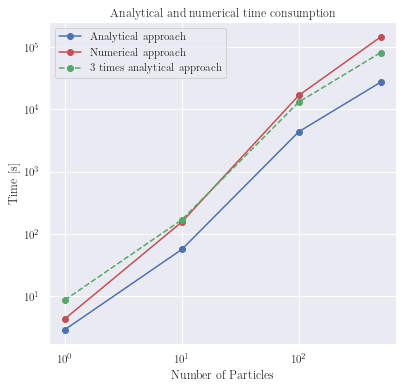

In [4]:
fig, ax1 = plt.subplots()
fig.set_size_inches(w=w*1.0,h= 5.5)

ax1.set_xscale('log')
ax1.set_yscale('log')

ax1.set_ylabel('Time [s]')
ax1.set_xlabel('Number of Particles')

ax1.plot(particles, (analytical_df['Time']), 'bo-', label = 'Analytical approach')
ax1.plot(particles, (numerical_df['Time']), 'ro-', label = 'Numerical approach')
ax1.plot(particles, (analytical_df['Time']*3), 'go--', label = '$3$ times analytical approach')

ax1.legend()
plt.title('Analytical and numerical time consumption')
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.savefig(data_path('Figures/analytical_vs_numerical.pgf'))
plt.show()

/usr/local/lib/python3.7/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


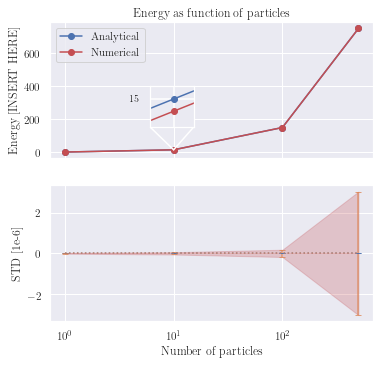

In [5]:
zero_array = np.zeros(len(analytical_df['Particles']))
# plot
fig = plt.figure()
w = 5.78851          # Latex document text width
fig.set_size_inches(w=w*1.0,h= 5.5)
# only errorbar
ax1 = plt.subplot(211)

#In case of more plots, we will make sure it's easy to add in a loop
ax1.plot(analytical_df['Particles'],analytical_df['Energy'],'bo-', label = 'Analytical')
ax1.plot(numerical_df['Particles'],numerical_df['Energy'],'ro-', label = 'Numerical')

# errorbar + fill_between
ax1.set_ylabel("Energy [INSERT HERE]")
plt.title("Energy as function of particles")


ax1.set_xscale('log')
ax1.xaxis.set_major_formatter(plt.NullFormatter())
ax1.legend()
#ax1.set_yscale('log')

ax2 = plt.subplot(212)
#In case of more plots, we will make sure it's easy to add in a loop
for data in [analytical_df, numerical_df]:
    ax2.errorbar(x=data['Particles'],y=zero_array,yerr=1e6*data['STD'], alpha=.75, fmt=':', capsize=3, capthick=1)
    data = {
        'x': data['Particles'],
        'y1': [y - e for y, e in zip(zero_array, 1e6*data['STD'])],
        'y2': [y + e for y, e in zip(zero_array, 1e6*data['STD'])]}
    ax2.fill_between(**data, alpha=.25, color='r')

ax2.set_xlabel('Number of particles')
ax2.set_ylabel('STD [1e-6]')
ax2.set_xscale('log')
#ax2.set_yscale('log')



ax3 = fig.add_axes([0.365, 0.615, 0.105, 0.105])
ax3.plot([0,20],[15,15],'w')
ax3.plot([10,10],[14,16],'w')
ax3.plot(analytical_df['Particles'],analytical_df['Energy'],'bo-',label='analytical')
ax3.plot(numerical_df['Particles'],numerical_df['Energy'],'ro-',label='numerical')
ax3.set(xlim=(9.99995, 10.00004), ylim=(14.99978, 15.0001))
ax3.set_xscale('log')
ax3.set_yscale('log')

plt.xticks([])

#ax3.axes.get_xaxis().set_ticks([])
#ax3.axes.get_yaxis().set_ticks([])
#ax3.legend(loc='lower left', bbox_to_anchor= (0.0, 1.01), ncol=2, 
#            borderaxespad=0, frameon=False)

ax1.plot([10,6.15],[15,150],'w')
ax1.plot([10,15.15],[15,150],'w')
ax1.text(3.88, 312, '15')

plt.savefig(data_path('Figures/numerical_analytical_energy.pgf'))
plt.show()

It is impressive how accurate the numerical approach is, and this is indeed a great motivation for further studies within the field of numerical derivatives. However, it does lack the efficiency in computational powers, as it is very CPU and time consuming. 

In addition, since the simulation with 500 particles was done with less Monte Carlo cycles, the standard deviation is big as this increases with less cycles. 

## Brute Force Metropolis Algorithm

In [6]:
bruteForce =  pd.read_fwf(data_path("Brute_Force10_particles_3_dim.dat"))
importanceSampling =  pd.read_fwf(data_path("Importance_Sampling10_particles_3_dim.dat"))
print ('Brute Force:\n')
print (bruteForce)
print(' #Importance Sampling:\n')
print(importanceSampling)

Brute Force:

    StepLength  Acceptance_rate  Energy  STD        Time
0          0.1         0.972911    15.0  0.0   94.327447
1          0.2         0.945664    15.0  0.0   98.683409
2          0.3         0.918701    15.0  0.0   97.638239
3          0.4         0.891924    15.0  0.0   97.951496
4          0.5         0.865267    15.0  0.0   99.363871
5          0.6         0.838798    15.0  0.0   98.278352
6          0.7         0.812554    15.0  0.0   98.876843
7          0.8         0.786263    15.0  0.0   98.904356
8          0.9         0.760836    15.0  0.0   99.062790
9          1.0         0.735348    15.0  0.0  100.449510
10         1.1         0.710625    15.0  0.0   98.574959
11         1.2         0.685770    15.0  0.0   98.628863
12         1.3         0.661636    15.0  0.0   98.781444
13         1.4         0.637576    15.0  0.0   98.862706
14         1.5         0.614447    15.0  0.0   98.978675
15         1.6         0.591130    15.0  0.0   99.110072
16         1.7   

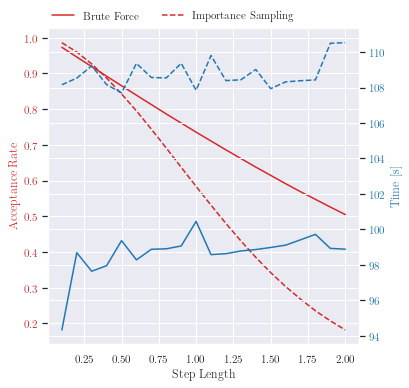

In [7]:
fig, ax1 = plt.subplots()
# plot
w = 5.78851          # Latex document text width
fig.set_size_inches(w=w*1.0,h= 5.5)
color = 'tab:red'
ax1.set_xlabel('Step Length')
ax1.set_ylabel('Acceptance Rate', color=color)


ax1.plot(bruteForce.iloc[:,0],  bruteForce['Acceptance_rate'], color=color, label='Brute Force')
ax1.tick_params(axis='y', labelcolor=color)
ax1.plot(importanceSampling.iloc[:,0],  importanceSampling['Acceptance_rate'], color=color,linestyle='dashed', label='Importance Sampling')


ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:blue'
ax2.set_ylabel('Time [s]', color=color)  # we already handled the x-label with ax1
ax2.plot(bruteForce.iloc[:,0], bruteForce['Time'], color=color,label=False)
ax2.plot(importanceSampling.iloc[:,0], importanceSampling['Time'], color=color, linestyle='dashed')
ax2.tick_params(axis='y', labelcolor=color)


ax1.legend(loc='lower left', bbox_to_anchor= (0.0, 1.01), ncol=2, 
            borderaxespad=0, frameon=False)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.savefig(data_path('Figures/brutevsImp_1.pgf'))


plt.show()

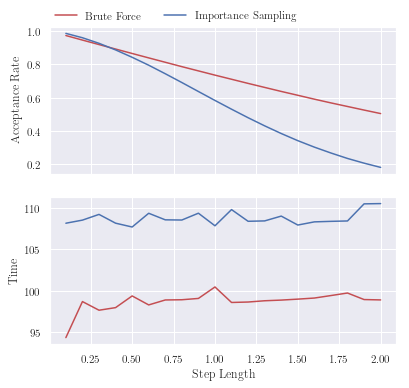

In [8]:
fig = plt.figure()
w = 5.78851          # Latex document text width
fig.set_size_inches(w=w*1.0,h= 5.5)

ax1 = fig.add_subplot(211)
ax1.plot(bruteForce.iloc[:,0], bruteForce['Acceptance_rate'], color='r',label='Brute Force')
ax1.plot(importanceSampling.iloc[:,0], importanceSampling['Acceptance_rate'], color='b', label='Importance Sampling')
ax1.set_ylabel('Acceptance Rate')
ax1.xaxis.set_major_formatter(plt.NullFormatter())
ax1.legend(loc='lower left', bbox_to_anchor= (0.0, 1.01), ncol=2, 
            borderaxespad=0, frameon=False)


ax2 = plt.subplot(212)
ax2.plot(bruteForce.iloc[:,0], bruteForce['Time'], color='r')
ax2.plot(importanceSampling.iloc[:,0], importanceSampling['Time'], color='b')
ax2.set_xlabel('Step Length')
ax2.set_ylabel('Time')

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.savefig(data_path('Figures/brutevsImp_2.pgf'))
plt.show()


## Repulsive approach 

So far, we have only been looking at particles with no interaction. Now it is time to turn to the elliptic trap with a repulsive interaction. Once again, we will have to tune the variational parameter $\alpha$. 

In [9]:
gd_alphas = {}
alphas = []

for i in range(1,10):
    gd_alphas['alpha0'+str(i)] =  pd.read_fwf(data_path("Task_e/GD_10particles_0."\
                                                        + str(i) + "00000alpha.dat"))['Energy']
    alphas.append(float(i)*0.1)
print(alphas)    

[0.1, 0.2, 0.30000000000000004, 0.4, 0.5, 0.6000000000000001, 0.7000000000000001, 0.8, 0.9]


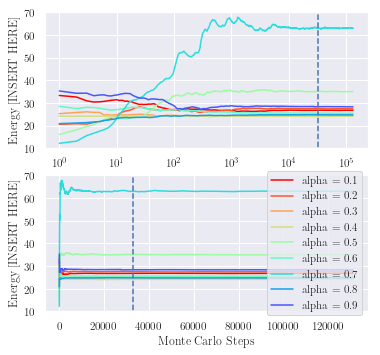

In [10]:
fig= plt.figure()
fig.set_size_inches(w=w*1.0,h= 5.5)

ax1 = fig.add_subplot(211)
color=iter(cm.rainbow(np.linspace(1,0,10)))
c = next(color)
for i in range(1,10):
    ax1.plot(np.linspace(1,len(gd_alphas['alpha0'+str(i)]),len(gd_alphas['alpha0'+str(i)])),\
             gd_alphas['alpha0'+str(i)], color = c, label = 'alpha = 0.'+ str(i))
    c = next(color)
ax1.set(ylim=(10, 70))
ax1.set_xscale('log')
ax1.set_ylabel('Energy [INSERT HERE]')

color=iter(cm.rainbow(np.linspace(1,0,10)))
c = next(color)
for i in range(1,10):
    ax2.plot(np.linspace(1,len(gd_alphas['alpha0'+str(i)]),len(gd_alphas['alpha0'+str(i)])),\
             gd_alphas['alpha0'+str(i)], color = c)
    c = next(color)


#ax2 = fig.add_axes([0.750, 0.455, 0.15, 0.15])
#ax2.set(xlim=(9.99995, 10.00004), ylim=(14.99978, 15.0001))
#ax2.set_xscale('log')
#ax2.set_yscale('log')
#0.1*2^17  = 0.8*2^14 which is around 10%
#2^15 = 25% of 2^17. 
ax1.plot([int(2**15),int(2**15)], [0,100], linestyle = 'dashed')


ax2 = fig.add_subplot(212)
color=iter(cm.rainbow(np.linspace(1,0,10)))
c = next(color)
for i in range(1,10):
    ax2.plot(np.linspace(1,len(gd_alphas['alpha0'+str(i)]),len(gd_alphas['alpha0'+str(i)])),\
             gd_alphas['alpha0'+str(i)], color = c, label = 'alpha = 0.'+ str(i))
    c = next(color)
ax2.set(ylim=(10, 70))
#ax1.set_xscale('log')
ax2.set_ylabel('Energy [INSERT HERE]')
ax2.set_xlabel('Monte Carlo Steps')
ax2.plot([int(2**15),int(2**15)], [0,100], linestyle = 'dashed')

ax2.legend(loc='right')


plt.title('')
plt.savefig(data_path('Figures/oppg_e_alpha.pgf'))
plt.show()


## Blocking

In performing the Monte Carlo analysis we will use the blocking technique to make the statistical analysis of the numerical data. 

In [11]:
def block(x):
    # preliminaries
    n = len(x)
    d = int(np.log2(n))
    s, gamma = np.zeros(d), np.zeros(d)
    mu = np.mean(x)

    # estimate the auto-covariance and variances
    # for each blocking transformation
    for i in np.arange(0,d):
        n = len(x)
        # estimate autocovariance of x
        gamma[i] = (n)**(-1)*np.sum( (x[0:(n-1)]-mu)*(x[1:n]-mu) )
        # estimate variance of x

        s[i] = np.var(x)
        # perform blocking transformation
        x = 0.5*(x[0::2] + x[1::2])

    # generate the test observator M_k from the theorem
    M = (np.cumsum( ((gamma/s)**2*2**np.arange(1,d+1)[::-1])[::-1] )  )[::-1]

    # we need a list of magic numbers
    q =np.array([6.634897,9.210340, 11.344867, 13.276704, 15.086272, 16.811894, 18.475307, 20.090235, 21.665994, 23.209251, 24.724970, 26.216967, 27.688250, 29.141238, 30.577914, 31.999927, 33.408664, 34.805306, 36.190869, 37.566235, 38.932173, 40.289360, 41.638398, 42.979820, 44.314105, 45.641683, 46.962942, 48.278236, 49.587884, 50.892181])

     # use magic to determine when we should have stopped blocking
    for k in np.arange(0,d):
        if(M[k] < q[k]):
            break
    if (k >= d-1):
        print("Warning: Use more data")
    return mu, s[k]/2**(d-k)

In [12]:
frame = {}
mean_list = []
std_list = []

for i in range(1,10):
    infile =  open(data_path("Task_e/GD_10particles_0."+ str(i) + "00000alpha.dat"),'r')
    infile.readline()
    data = np.loadtxt(infile)
    data = data[:]
    (mean, var) = block(data)
    std = np.sqrt(var)
    mean_list.append(mean)
    std_list.append(std)
    
frame['Mean'] = mean_list
frame['STDev'] = std_list
frame['Alpha'] = alphas

frame = pd.DataFrame(frame)
print(frame)

        Mean     STDev  Alpha
0  26.729462  0.006821    0.1
1  27.431999  0.009036    0.2
2  24.355419  0.012083    0.3
3  24.097526  0.002808    0.4
4  35.024047  0.014249    0.5
5  25.475507  0.008416    0.6
6  63.016748  0.038277    0.7
7  24.750829  0.004851    0.8
8  28.341532  0.011824    0.9


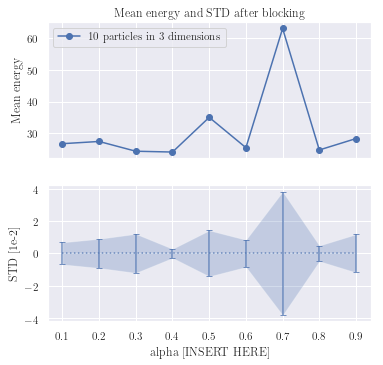

In [13]:
zero_array = np.zeros(len(frame['Alpha']))
# plot
fig = plt.figure()
w = 5.78851          # Latex document text width
fig.set_size_inches(w=w*1.0,h= 5.5)
# only errorbar
ax1 = plt.subplot(211)

#In case of more plots, we will make sure it's easy to add in a loop
for data in [frame]:
    ax1.plot(data['Alpha'],data['Mean'],'ob-')
# errorbar + fill_between
ax1.set_ylabel("Mean energy")
plt.title("Mean energy and STD after blocking")
ax1.legend(['10 particles in 3 dimensions'])
ax1.xaxis.set_major_formatter(plt.NullFormatter())


ax2 = plt.subplot(212)
#In case of more plots, we will make sure it's easy to add in a loop
for data in [frame]:
    ax2.errorbar(x=data['Alpha'],y=zero_array,yerr=100*data['STDev'], alpha=.75, fmt=':', capsize=3, capthick=1)
    data = {
        'x': data['Alpha'],
        'y1': [y - e for y, e in zip(zero_array, 100*data['STDev'])],
        'y2': [y + e for y, e in zip(zero_array, 100*data['STDev'])]}
    ax2.fill_between(**data, alpha=.25)
#ax2.set_title('STD after blocking method ')
ax2.set_xlabel('alpha [INSERT HERE]')
ax2.set_ylabel('STD [1e-2]')
plt.savefig(data_path('Figures/blocking_alphas.pgf'))
plt.show()


We are here 60% sure that the exact value is within the standard deviation. 